<a href="https://colab.research.google.com/github/Chood16/DSCI222/blob/main/lectures/(12)_ML_Overview_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning with Scikit-Learn



## Algorithms for Supervised Learning Using Scikit-Learn

**What is Supervised Learning?**

* Goal: Predict discrete labels from input features
* Types:
  * Regression: used to predict continuous numerical values
  * Classification: used to predict categories
* The model "learns" from labeled training data
* For comparison, in unsupervised learning, the model "learns" from training data that doesn't already have labels applied

* Regression Example: Imagine having a collection of houses as your data.

  * Supervised Learning: The model would be provided with features of each house (size, number of bedrooms, age, location) and the actual house prices. The model would then learn to predict the price of a new house based on its features.

  * Unsupervised Learning (or pattern discovery for numeric data): The model would look for patterns or groupings in the features of the houses without knowing their prices. For example, it might cluster houses into groups with similar size, age, or neighborhood characteristics. The focus is on finding structure in the numeric data, not predicting specific prices.

* Classification Example: Imagine having a collect of emails as your data.
    * Supervised Learning: The model would be provided with both emails, and each email would have a label of spam or not spam. The model would then be able to predict if an email should be assigned the spam label or not
    * Unsupervised Learning: The model would look for patterns in the data to group emails together. The focus would be more on the email structures, not on the assignment of a label

* More regression examples (predict continuous numbers):

  * Stock price forecasting

  * Predicting a patient’s blood pressure or cholesterol level

  * Predicting temperature or rainfall

* More classification examples (predict discrete labels):


  * Image recognition (cat / dog / car / etc.)

  * Medical diagnosis (disease / no disease)



# Regression
* Machine learning where the goal is to predict a continuous numerical value
* We are going to try to use attributes of a house to predict its price

In [ ]:
import numpy as np
import pandas as pd

# fetch_california_housing is sample data we will be using
from sklearn.datasets import fetch_california_housing

# train_test_split is used to split our data
from sklearn.model_selection import train_test_split

# ElasticNet is a model we will be using (stat 545 and future DSCI courses)
from sklearn.linear_model import ElasticNet

# mean_squared_error is a performance metric that quantifies prediction error (stat 512)
from sklearn.metrics import mean_squared_error

In [ ]:
# Load California housing dataset
housing = fetch_california_housing()


In [ ]:
# Description of the dataset to better understand what it includes
print(housing.DESCR)

In [ ]:
# What is housing?
print(type(housing))

# notice it is not <class 'pandas.core.frame.DataFrame'>
# for a Bunch object, data can be accessed as an attribute or as a dictionary

In [ ]:
# Feature Names using both attribute and dictionary
print(' Feature Names:')
display(housing.feature_names)
display(housing['feature_names'])

# Target Names using both attribute and dictionary
print('\n Target Names:')
display(housing.target_names)
display(housing['target_names'])

In [ ]:
# Create a dataframe of the features
df_features = pd.DataFrame(housing.data, columns=housing.feature_names)
df_features.head()

In [ ]:
# Create a dataframe of the target variable
df_target = pd.DataFrame(housing.target, columns=housing.target_names)
df_target.head()

We are going to use this data to do two things


1.   Create the model (training)
2.   Check to see how good the model is (testing)

If we used the same dataset for both, we would fall victim to overfitting, so we split the data. One part is used for training and the other is used for testing.



In [ ]:
# To Split the data into training and testing sets
# test_size is used to determine what percentage of the data is used for training (70/30)
# test_size is typically between 20-30%. It can get as low as 10% for extremely large samples

X = df_features
Y = df_target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Fit a Machine Learning Model**

**General Approach**
1. **Train / Fit** the model on the **training set** (`fit`)
2. **Test** the fitted model on the **test set** (`predict`)

---

**Model Choice**: Elastic Net Regression

Elastic Net Regression is a linear regression model that combines Lasso (L1) and Ridge (L2) regularization.

It helps prevent overfitting and manages correlated features by shrinking less important coefficients toward zero.

In comparison to what we will see later, this is a type of feature selection where we eliminate certain features.

---

**What Does the Linear Regression Model Look Like?**

The model predicts a continuous outcome using the linear equation:

$
y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n
$

Where:
- $b_0$ = intercept (bias)  
- $b_i$ = coefficient for each feature $x_i$



In [ ]:
# Create an instance of Elastic Net Regression
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)

Common Regression Models

| Model                                   | Description                                            | When to use                                        |
| --------------------------------------- | ------------------------------------------------------ | -------------------------------------------------- |
| **Linear Regression**                   | Simple linear relationship between features and target | Baseline, interpretable, fast                      |
| **Ridge Regression**                    | Linear regression with L2 regularization               | When features are correlated or overfitting occurs |
| **Lasso Regression**                    | Linear regression with L1 regularization               | Automatic feature selection                        |
| **ElasticNet**                          | Combines L1 & L2 regularization                        | Mixed benefits of Ridge + Lasso                    |
| **Decision Tree Regressor**             | Nonlinear splits of features                           | Can model complex relationships, interpretable     |
| **Random Forest Regressor**             | Ensemble of trees                                      | Reduces overfitting, handles nonlinearities        |
| **Gradient Boosting Regressor (GBR)**   | Sequential trees to minimize errors                    | High accuracy, can overfit without tuning          |
| **XGBoost / LightGBM / CatBoost**       | Advanced gradient boosting variants (not part of Scikit-Learn)                    | Large datasets, high performance                   |
| **k-Nearest Neighbors Regressor (kNN)** | Predict based on nearest neighbors                     | Nonparametric, sensitive to feature scaling        |
| **Support Vector Regressor (SVR)**      | Uses kernel methods for regression                     | When data is high-dimensional or nonlinear         |
| **Neural Networks**                     | Flexible nonlinear models                              | Complex patterns, large datasets                   |


In [ ]:
# 1) Train/Fit the model using the training partition

# We could have used y_train or y_train.MedHouseVal
enet.fit(X_train, y_train.MedHouseVal)

In [ ]:
# We get these numbers out, what do they mean?

# In Scikit-Learn, all attributes that result from a model being fit end in an underscore
print(enet.coef_)
print(enet.intercept_)

# notice some coeficients are zero?

In [ ]:
display(X_test.head())

In [ ]:
# Now that we've trained our model, we must test it
# 2) Test the fitted model in a TEST set
y_pred = enet.predict(X_test)

In [ ]:
# Let's compare the REAL vs the PREDICTION
result = pd.DataFrame({'Actual' : y_test.MedHouseVal, 'Predicted' : y_pred})
result

In [ ]:
# To numerically evaluate the model
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Common Regression Evaluation Metrics
| Metric                             | Description                                                    | Interpretation                              |
| ---------------------------------- | -------------------------------------------------------------- | ------------------------------------------- |
| **Mean Squared Error (MSE)**       | Average squared difference between actual and predicted values | Lower is better; sensitive to outliers      |
| **Root Mean Squared Error (RMSE)** | Square root of MSE                                             | Same units as target, easier to interpret   |
| **Mean Absolute Error (MAE)**      | Average absolute difference between actual and predicted       | Less sensitive to outliers than MSE         |
| **R-squared (R²)**                 | Proportion of variance in the target explained by the model    | 0–1 (1 = perfect fit, <0 = worse than mean) |
| **Adjusted R-squared**             | R² adjusted for number of predictors                           | Penalizes for unnecessary features          |
| **Median Absolute Error**          | Median of absolute differences                                 | Robust to outliers                          |


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.title("Actual vs Predicted")

# create a y=x line for comparison. What do we see?
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# Classification
* Machine learning where the goal is to predict a categorical bucket
* We are going to try to use attributes to see if a user will make a purchase from an ad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LogisticRegression is a supervised classification algorithm that predicts categorical outcomes
from sklearn.linear_model import LogisticRegression





Why are we using something with Regression in its name for classification?

Logistic Regression is called "regression" because it uses a linear regression equation internally to estimate a probability. The model outputs a value between 0 and 1 using a logistic (sigmoid) function, which can be interpreted as the predicted probability of belonging to a class. The class with the highest probability becomes the predicted label. In our example we only have two classes (yes or no), but Logistic Regression can also handle more than two classes. This is called Multinomial Logistic Regression.

Common Classification Models
| Model                             | Description                                           |
| --------------------------------- | ----------------------------------------------------- |
| **Logistic Regression**           | Predicts probabilities for binary/multiclass outcomes |
| **Decision Tree Classifier**      | Tree-based splits to classify data                    |
| **Random Forest Classifier**      | Ensemble of trees to improve accuracy                 |
| **Gradient Boosting Classifier**  | Sequential trees to reduce errors                     |
| **XGBoost / LightGBM / CatBoost** | High-performance boosting methods                     |
| **k-Nearest Neighbors (kNN)**     | Classifies based on nearest neighbors                 |
| **Support Vector Machine (SVM)**  | Finds the best separating hyperplane                  |
| **Naive Bayes**                   | Probabilistic, assumes feature independence           |
| **Neural Networks**               | Can handle complex, nonlinear relationships           |


In [ ]:
# wget stands for "web get" and is a command-line utility used to download files from the internet.
# the downloaded file automatically is saved to files in Colab
!wget https://raw.githubusercontent.com/Chood16/DSCI222/main/lectures/Social_Network_Ads.csv


In [ ]:
social_N_data = pd.read_csv("Social_Network_Ads.csv")
pd.concat([social_N_data.head(), social_N_data.tail()])

Before diving into Classification, its good to do some exploration of the data first!


In [ ]:
# Let's make sure there are no missing values
# .any() checks to see if any values in the column are True
social_N_data.isnull().any()
# Conclusion: There are not missing values, so we are fine to proceed.

In [ ]:
# Categorical Plot (bar graph) of purchased

# using the hue parameter changes column color by "splitting" purchase categories
sns.catplot(x='Purchased',hue='Purchased', data=social_N_data, kind='count',legend=False)


In [ ]:
# How many Males and Females purchased the product
sns.catplot(x='Purchased', hue='Gender', data=social_N_data, kind='count')

In [ ]:
# Age distribution using distribution plot
# This is a more flexible version of histograms we learned before
sns.displot(x='Age', data=social_N_data, color='red', kde=True)

So it looks like females are more likely to make a purhcase than males. And users around the age of 40 most likely to make a purchase. We want to use this information to predict the likelihood a purchase will be made.

In [ ]:
# To clean and prepare the data, let's drop 'User ID'

# axis=1 tells Pandas User ID is a column
social_N_data.drop('User ID', axis=1, inplace=True)

pd.concat([social_N_data.head(), social_N_data.tail()])

How can we enter Male/Female as an input since inputs have to be numerical?

In [ ]:
# Information of the dataset
social_N_data.info()

# The Gender variable is an object datatype (treated as categorical)

In [ ]:
# We can convert a categorical variables to dummy variable/indicator variable
# use the oneHotEncoder method (let's explore it)
pd.get_dummies(social_N_data['Gender'])


# Why is this redudant?

In [ ]:
# Let's use only the Male column
pd.get_dummies(social_N_data['Gender'], drop_first=True)

In [ ]:
# What if we want 1s and 0s instead of True and False?
pd.get_dummies(social_N_data['Gender'], drop_first=True).astype(int)

# The model we will be developing will support both forms of dummy variables

In [ ]:
# Let's rerun a few of the previous steps together


social_N_data = pd.read_csv("Social_Network_Ads.csv")
social_N_data.drop('User ID', axis=1, inplace=True)

# Now we can save this dummy variable column
dummy = pd.get_dummies(social_N_data['Gender'], drop_first=True).astype(int)
social_N_data = pd.concat([social_N_data,dummy], axis=1)

# and we'll drop the object variable column Gender
social_N_data.drop('Gender',axis=1,inplace=True)


# Information of the dataset. Now we have all numeric data!
# Notice the column headers now
social_N_data.info()

In [ ]:
# Now it should start to feel pretty similar to what we did for Regression

# Split the data into independent (X) and dependent (y) variables

# Independent Variables (X)
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
display( X.head(10) )



In [ ]:
# Dependent Variable (y)
y = social_N_data.iloc[:, [2]] # Purchased
display(y.head(10))

### Feature Scaling

Before performing machine learning, we can make some modifications to the data to help improve algorithm performance. Feature scaling is used to standardize or normalize features (independent variables) so that they are on a similar scale. This helps many machine learning algorithms converge faster and perform better.

Standardization transforms features to have mean = 0 and standard deviation = 1, approximating a standard Gaussian distribution.

In [ ]:
# X before:
display(X)
type(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# We must first "create" an instance scaling tool
sc = StandardScaler()

# Then use it to transform the data
X = sc.fit_transform(X)
display(X)
type(X)

In [ ]:
# Splitting the dataset into train and test sets like we did for Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

**Fit a Machine Learning Model**

General Approach
1. **Train / Fit** the model on the **training set** (`fit`)
2. **Test** the fitted model on the **test set** (`predict`)

---

**Model Choice**: Logistic Regression

Logistic Regression is used to model the probability of a binary or categorical outcome based on one or more input features.

---

What Does the Logistic Regression Model Look Like?**

The model estimates the probability of an outcome (e.g., `Purchased = 1`) using the logistic (sigmoid) function:

$
\displaystyle
P(y = 1) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n)}}
$

Where:
- $ b_0$ = intercept (bias)
- $b_i$ = coefficient for each feature $x_i$


In [ ]:
# Create an instance of LogisticRegression
classifier = LogisticRegression()

In [ ]:
# 1) Train/Fit model in a TRAIN set
classifier.fit(X_train, y_train.Purchased)

In [ ]:
# We get these numbers out, what do they mean?
display( classifier.coef_ )
display( classifier.intercept_ )

In [ ]:
# Now that we've trained our model, we must test it
# 2) Test the fitted model in a TEST set

# This shows the probability of each classification (0 or 1)
y_prob = classifier.predict_proba(X_test)
print(y_prob[:10])

In [ ]:
# How are probabilities used to determine the outcome?
y_pred = classifier.predict(X_test)
print(y_pred)

In [ ]:
# To visually compare the REAL vs the PREDICTION
result = pd.DataFrame({'Actual' : y_test.Purchased, 'Predicted' : y_pred})
result

In [ ]:
# accuracy_score, confusion_matrix are used to evaluate how good your model is
from sklearn.metrics import accuracy_score, confusion_matrix

# Some ways to test our model
print(f"Accuracy:, {accuracy_score(y_test, y_pred)*100:.2f}%")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'],
            cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# Clustering (Unsupervised Learning)

Clustering is an unsupervised learning method that groups data points based on their similarity. The goal is to discover patterns or natural structure in data without using predefined labels. Clustering is helpful because it reveals hidden relationships and simplifies complex datasets. It is often a first step in data exploration and can provide valuable insights before building predictive models. Once clusters are identified, they have the option to then be used as features of future machine learning models

In [ ]:
from sklearn.datasets import make_blobs # <-- makes fake data
from sklearn.cluster import KMeans # <-- clusters data
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
# Dataset: Customer Segmentation based on their income and spending score
df_customer = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv')
df_customer.head()

In [ ]:
# To keep the variables of interest
# .filter() works the opposite of drop
X = df_customer.filter(["Annual Income (k$)", "Spending Score (1-100)" ])
X.head()

In [ ]:
# Exploratory Analysis
# 2D graphical view
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c = "green")

## K-Means Clustering Method

Model Choice: K-Means Clustering

K-Means is an unsupervised learning algorithm used to group unlabeled data into K distinct clusters based on feature similarity.
It tries to place data points into clusters such that points within the same cluster are as close as possible to each other, and as far as possible from points in other clusters.

---

What Does the K-Means Model Do?

K-Means aims to minimize the total within-cluster sum of squares (WCSS) — also called inertia:


$\text{WCSS} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2$

Where:

$K$ = number of clusters

$C_k$ = set of points assigned to cluster $k$

$x_i$ = a data point

$\mu_k$ = the centroid (mean position) of cluster $k$

---

ELI5: Make clusters such that the points are close to each other

---

How the Algorithm Works (Iterative Steps)

1. Initialize: Randomly choose K cluster centers (centroids).

2. Assign: Each data point is assigned to the nearest centroid.

3. Update: Recalculate each centroid as the mean of all points in that cluster.

4. Repeat: Steps 2-3 until the centroids stop moving (the algorithm converges).


---
You can determine the number of clusters to use with the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

In [ ]:
# Create the model instance, where 5 clusters will be used
# and the algorithm will run 10 separate times, picking the best one
model_kmeans = KMeans(n_clusters = 5, n_init=10)

# Run the clustering method
model_kmeans.fit(X)

In [ ]:
# Centroids of model
print(model_kmeans.cluster_centers_)

In [ ]:
# Labels from model
print(model_kmeans.labels_)

In [ ]:
clustered_data = pd.concat([X, pd.Series(model_kmeans.labels_, name="Cluster")], axis=1)
display(clustered_data)

In [ ]:
# Visualization of Clusters

# The Data
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c= model_kmeans.labels_, cmap= 'rainbow' )
# The Centroids
sns.scatterplot(x=model_kmeans.cluster_centers_[:, 0], y=model_kmeans.cluster_centers_[:, 1], c=['black'])

## DBSCAN Method

Model Choice: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is an unsupervised learning algorithm used to group data points into clusters based on density, rather than a fixed number of clusters.
It tries to find areas where points are densely packed, and labels points in sparse regions as noise.

---

What Does the DBSCAN Model Do?

DBSCAN defines clusters based on two parameters:

1. epsilon (eps): The radius around a point to consider neighbors.

2. min_samples: Minimum number of neighbors required to form a dense region.

---

Points are classified as:

* Core points: Have at least min_samples neighbors within eps.

* Border points: Within eps of a core point but with fewer than min_samples neighbors.

* Noise points: Neither core nor border points (considered outliers).

Unlike K-Means, DBSCAN does not minimize WCSS or rely on centroids — it finds clusters by density connectivity.

---

ELI5: DBSCAN draws circles (eps) around each point. If a circle has enough neighbors (min_samples), the corresponding point becomes a core point. If a point is inside of a circle but is not a core point, it is a border point. These together form clusters. Points outside of clusters are left as “noise.”

Result: clusters form naturally wherever points are packed closely together. We also do not force all points to belong to a cluster

---
How the Algorithm Works (Iterative Steps)

1. Pick a point.

2. Find neighbors within distance eps.

3. Cluster point check:

    * If # of neighbors ≥ min_samples → start a new cluster.

    * Else → mark as noise temporarily (may become border point later).

4. Expand cluster:
    * If a cluster was formed, the point selected is now a core point and all neighbors are temporariyly border points (may become core point later).

5. Repeat process for all selected border points. border points that meet the min_samples qualification become core points of said cluster and all new neighbors are added to the cluster as border points.

6. Repeat process for any point not "absorbed" by the initial cluster.

---

Determining DBSCAN Parameters

Unlike K-Means, DBSCAN does not require specifying the number of clusters.

* You choose eps and min_samples using methods like:

  * [k-distance plot](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) (aka [Nearest Neighbor Graph](https://en.wikipedia.org/wiki/Nearest_neighbor_graph)): plot the distance to each point’s k-th nearest neighbor and look for a sharp change.

  * Domain knowledge: what counts as “close” and “dense” in your dataset.

In [ ]:
# To Fit a ML Clustering Model
from sklearn.cluster import DBSCAN

# Create instance of model
# We'll just pick eps and min_samples for simiplicity
model_dbscan = DBSCAN(eps=9, min_samples=5)

# To run the clustering method
model_dbscan.fit(X)

In [ ]:
# Labels assigned by the method
# *** Noisy samples are given the label -1

print('All: ')
print(model_dbscan.labels_)



In [ ]:
# Total detected labels
print('\nDetected: ')
print( np.unique(model_dbscan.labels_) )
print('\nNumber of classes detected: ')
print( np.unique(model_dbscan.labels_).shape[0] )

In [ ]:
clustered_data = pd.concat([clustered_data, pd.Series(model_dbscan.labels_, name="DBSCAN")], axis=1)
display(clustered_data)

In [ ]:
# Visualization of Clusters Using DBSCAN
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c= model_dbscan.labels_, cmap= 'rainbow' )

# [Dimensionality Reduction](https://www.youtube.com/watch?v=9iol3Lk6kyU)

Dimensionality reduction is the process of reducing the number of input features (or variables) in a dataset while preserving as much useful information as possible.

Remember when we talked about reducing the number of features before? Here, we are not reducing the total number of features through elimination, but rather through transformation

Why do we want this?
* Reduces overfitting data (redundancy)
* Less data to store
* Faster model training

---

How do we know which inputs we should keep and which we should no longer consider? We look for patterns and correlations in the data. Patterns can come in two forms, linear and non-linear.

* Linear methods (Matrix-based methods)
  * Assume straight-line relationships between variables
  * PCA (Principal Component Analysis, early 1900s) is the most common method

* Non-linear methods (Neighbor-base methods):
  * The clustering methods we've learned are also Neighbor-based, but are not Dimensional Reduction
  * Captures more complex, curved structures in the data
  * t-SNE (t-distributed Stochastic Neighbor Embedding, 2008) was the standard historically
  * UMAP (Uniform Manifold Approximation and Projection, 2018) is up and coming

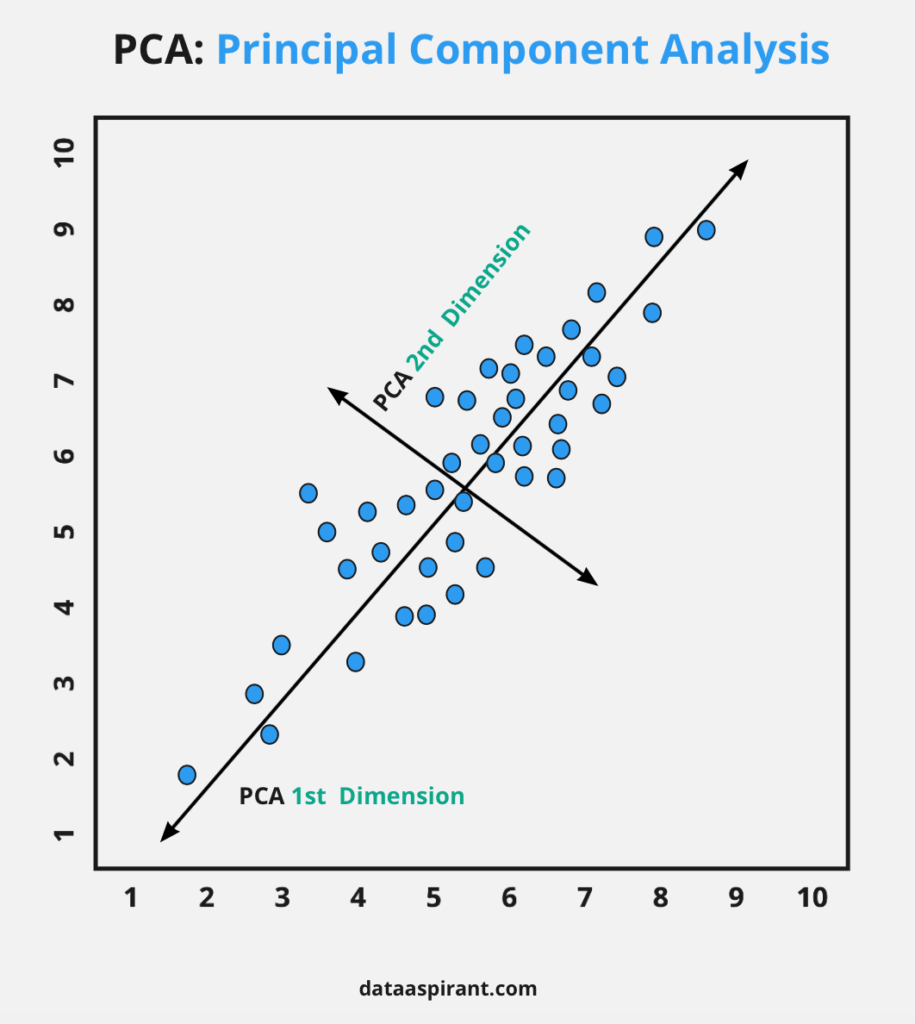


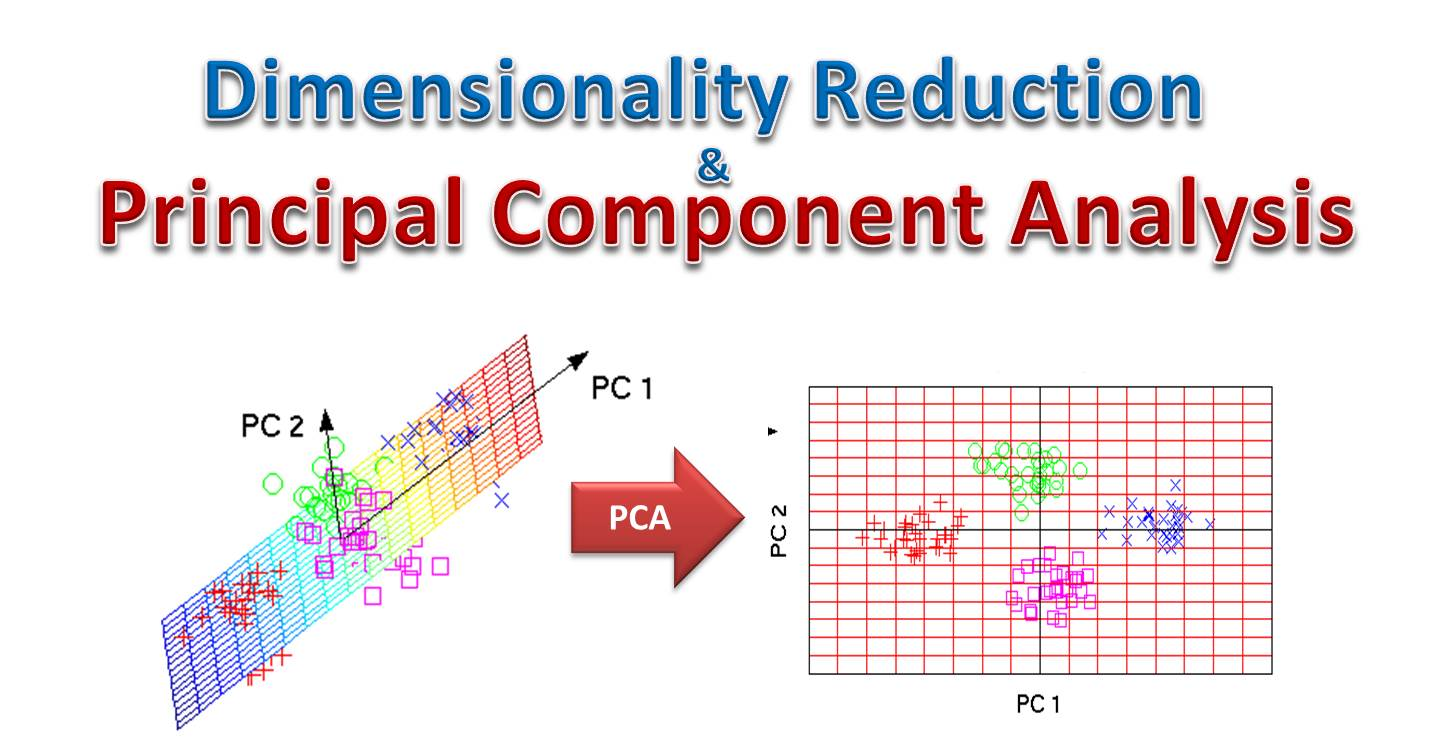

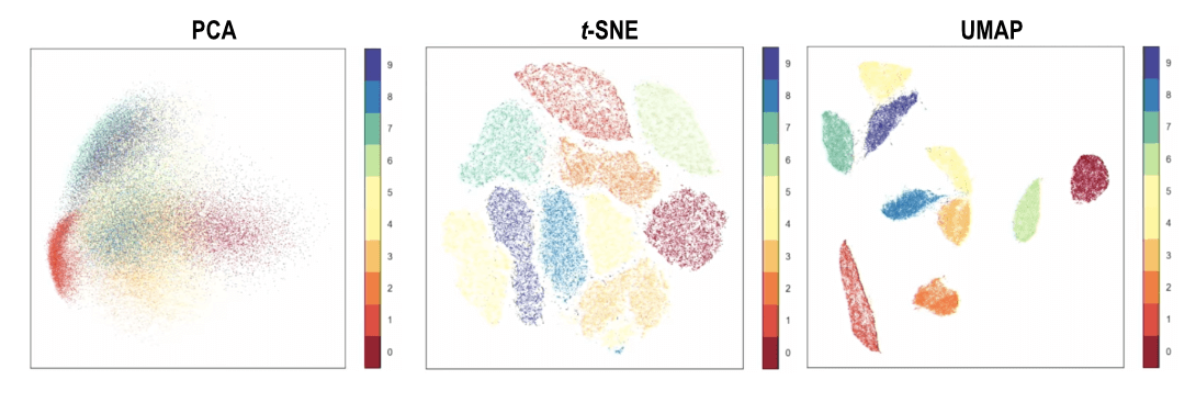

Let's perform Dimensional Reduction using these three methods on handwritten digits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# images of handwritten digits
from sklearn.datasets import load_digits

Before doing dimensional reduction, let's make sure we understand the data we are importing

Industry would use [the MNIST database](https://en.wikipedia.org/wiki/MNIST_database). load_digits() is smaller and easier to work with. Plus, it's built into sklearn.

In [ ]:
digits = load_digits()

# The Dataset
X = digits.data
y = digits.target

print('Data: ')
print(digits.data.shape)

print('\nTarget: ')
print(digits.target.shape)

print('\nDescription: ')
print(digits.DESCR)

In [ ]:
# Select the id of the observation
idObs = 6 # Index (0 through 1796)

# Each image observation is stored as an array of 64 digits, ranging from 0 to 16
print(digits.data[idObs,:])


In [ ]:
# So we need to reshape the 1D array into a 2D array
size_image = int(np.sqrt(digits.data.shape[1]))

sel_pic = digits.data[idObs,:].reshape((size_image, size_image))
display(sel_pic)

# Can you guess what the nubmer is from this?


In [ ]:
# To show the image
plt.imshow(sel_pic, cmap='Greys')
plt.show()

# Now what is your guess?

In [ ]:
# The target (answer) value
print('Target: ')
print(digits.target[idObs])

## Method 1: PCA (Principal Component Analysis)

In [ ]:
# decomposition will be used to creat our PCA method
from sklearn import decomposition

# Create an instance of PCA with 2 principal components
# We choose 2 so we can represent it on the x-y plane
pca = decomposition.PCA(n_components = 2)

# Run method to learn the PCA transformation from our data and then apply it to the same dataset
X_pca = pca.fit_transform(X)

In [ ]:
# To compare sizes
print('Original Dataset: ')
display( X.shape )

print('\nDimensionality Reduction (PCA): ')
display( X_pca.shape )

In [ ]:
# What does this data look like (before and after)
print(X[1])
print(X_pca[1])

* The goal of dimensionality reduction here is to reduce the number of features from 64 (8x8 pixel values) to 2 dimensions.

* By reducing dimensions, we aim to retain as much of the important structure in the data as possible.

* Ideally, the lower-dimensional representation should separate the digits 0-9 clearly, so that different digits form distinct clusters.

* The goal is not to perfectly reconstruct the images, but to preserve relationships and patterns that make digits distinguishable.

In [ ]:
# To Show the 2D Dataset
# Notice the colors correspond to the target
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.nipy_spectral,
        edgecolor='k',label=y)

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA Projection')
plt.show()

## Method 2: t-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
# manifold will be used to create our t-SNE method
from sklearn import manifold

# Create an instance of t-SNE with 2 dimensions
tsne = manifold.TSNE(n_components=2)

# Run method to learn the t-SNE transformation from our data and then apply it to the same dataset
X_tsne = tsne.fit_transform(X)


In [ ]:
# To compare sizes
print('Original Dataset: ')
display( X.shape )
print('\nDimensionality Reduction (t-SNE): ')
display( X_tsne.shape )

In [ ]:
# What does this data look like (before and after)
print(X[1])
print(X_tsne[1])

In [ ]:
# To Show the 2D Dataset
# Notice the colors correspond to the target
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.nipy_spectral,
        edgecolor='k',label=y)

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('t-SNE Projection')
plt.show()

## Method 3: UMAP (Uniform Manifold Approximation and Projection)

In [ ]:
# UMAP not included in Scikit-Learn so we use the UMAP library instead
import umap

# Create an instance of UMAP with 2 dimensions
#
umap_model = umap.UMAP(n_components=2)

# Run method to learn the UMAP transformation from our data and then apply it to the same dataset
X_umap = umap_model.fit_transform(X)

In [ ]:
# Compare sizes
print('Original Dataset: ')
display(X.shape)

print('\nDimensionality Reduction (UMAP): ')
display(X_umap.shape)

In [ ]:
# What does this data look like (before and after)
print(X[1])
print(X_umap[1])

In [ ]:
# To Show the 2D Dataset
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP Projection')
plt.show()